<h1>Spam SMS Classifier</h1>

<b>An implementation of Naive Bayes Algorithm for the purpose of accurately classifying Spam SMS for the real and meaningful ones.(Ham)<br>
The Dataset being used in this implementation has been taken from :- <br>
www.kaggle.com<br>
This data set contains about 5580 text messages in english language.<br>
Our goal is to Classify them as Spam or Ham with maximum Accuracy.<br></b>


In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
Data=pd.read_csv("Spam.csv",encoding="latin-1")
Data["Response_Cleaned"]=np.where(Data["Response"]=="spam",1,0)
X=[]
for i in range(0,Data.shape[0]):
    s=Data["Message"][i]
    s=s.upper()
    X.append(s.split())
Data["Words"]=X

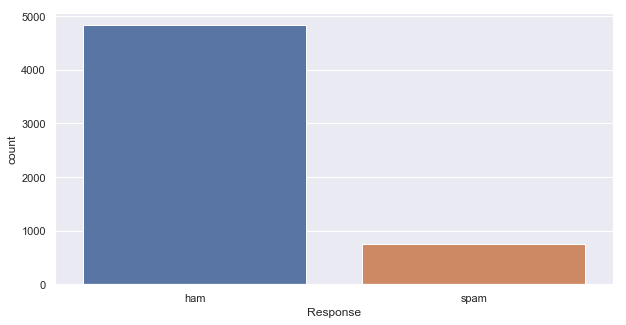

ham     4825
spam     747
Name: Response, dtype: int64


In [102]:
plt.figure(figsize=(10,5))
sns.countplot(x=Data['Response'])
sns.set(style='darkgrid')
plt.show()
x=Data['Response'].value_counts()
print(x)

<b>This Shows That The Maximum SMS in the given Data set are Ham.<br>
Number of Ham messages in The Data set is 4825<br>
and Number of Spam messages is 747<br>
Thus more than 86% of the total messages sent are Ham.<br></b>

<b>
To Get The Most Used Words in Spam Messages.
We will now create a wordcloud<b>

In [129]:
Spam=Data.loc[Data["Response"]=="spam"]
Spam=Spam[0:800]

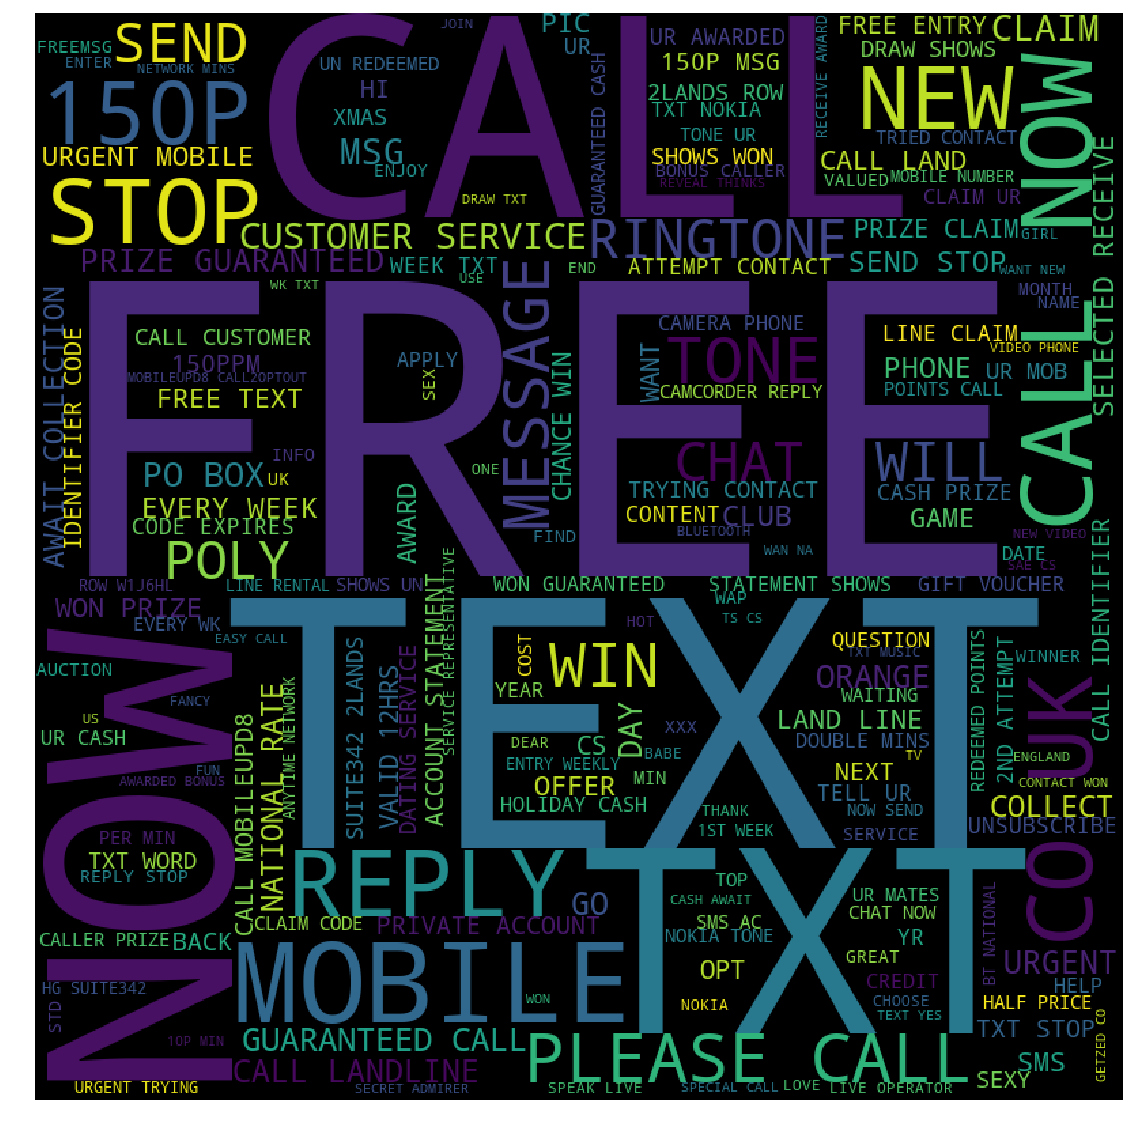

In [152]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import string

def Create_Words(temp):
    Cld_Words=''
    for wrd in temp["Words"]:
        text=str(wrd).upper()
        W=[]
        W=word_tokenize(text)
        W=[word for word in W if word not in stopwords.words('english')]
        for words in W:
            Cld_Words=Cld_Words+' '+words
    return Cld_Words

Spam_WordCloud=WordCloud(width=800,height=800).generate(Create_Words(Spam))
plt.figure(figsize=(20,20))
plt.imshow(Spam_WordCloud)
plt.axis('off')
plt.show()

<b> From This WordCloud we can infer that the most used words in the spam messages are Words like:-<br>
    Call<br>Now<br>Stop<br>Free<br>Text<br>TXT<br>Reply<br>Mobile<br>Please<br>Message<br>Chat<br>Urgent<br>Prize<br>
    New<br>Guaranteed</b>

<b>We now need to clean the data in machine interpretable form<br>
Also,<br>
we will now make seperate rows for the presence of common words in the dataset.</b>

In [159]:
def Clean(S,X):
    Clean=[]
    for i in range(0,Data.shape[0]):
        if S in X[i]:
            Clean.append(1)
        else:
            Clean.append(0)
    return Clean
Data["Call_Cleaned"]=Clean("CALL",X)
Data["Now_Cleaned"]=Clean("NOW",X)
Data["Free_Cleaned"]=Clean("FREE",X)
Data["Stop_Cleaned"]=Clean("STOP",X)
Data["Text_Cleaned"]=Clean("TEXT",X)
Data["Txt_Cleaned"]=Clean("TXT",X)
Data["Rep_Cleaned"]=Clean("REPLY",X)
Data["Mob_Cleaned"]=Clean("MOBILE",X)
Data["Pls_Cleaned"]=Clean("PLEASE",X)
Data["Mess_Cleaned"]=Clean("MESSAGE",X)
Data["Cht_Cleaned"]=Clean("CHAT",X)
Data["urg_Cleaned"]=Clean("URGENT",X)
Data["prz_Cleaned"]=Clean("PRIZE",X)
Data["new_Cleaned"]=Clean("NEW",X)
Data["grnt_Cleaned"]=Clean("GUARANTEED",X)
Features=["Call_Cleaned","Now_Cleaned","Free_Cleaned","Stop_Cleaned","Text_Cleaned","Txt_Cleaned","Rep_Cleaned","Mob_Cleaned","Pls_Cleaned","Mess_Cleaned","Cht_Cleaned",
         "urg_Cleaned","prz_Cleaned","new_Cleaned","grnt_Cleaned"]
Cleaned_Data=Data[Features]
Cleaned_Resp=Data[["Response_Cleaned"]]
bnb=BernoulliNB()
X_Train,X_Test,Y_Train,Y_Test=train_test_split(Cleaned_Data,Cleaned_Resp,test_size=0.1, random_state=5)
bnb.fit(X_Train,np.ravel(Y_Train,order='C'))
Y_Predicted=bnb.predict(X_Test)
a=X_Test.shape[0]
points=(Y_Predicted!=Y_Test["Response_Cleaned"]).sum()
acc=points/a
acc=(1-acc)*100
print("No of Mislabeled points out of {} : {}\nAccuracy: {:05.6f}%".format(a,points,acc))

No of Mislabeled points out of 558 : 23
Accuracy: 95.878136%


<b>Out of 558 test points, The algorithm mislabeled 23 of them<br>
The accuracy of the model is 95.8%<br>
This Shows that the Model is Very Accurate.<br>
This Also Shows that Naive Bayes Algorithm is a very good Classifier for Text-Based Data.</b>